## Instruction

**This notebook analyzes and demonstrates data from 40 replicate runs.**

In [3]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

print("Pandas version:", pd.__version__)
print('Numpy version:',  np.__version__)
print('Matplotlib version:',  matplotlib.__version__)

Pandas version: 0.25.3
Numpy version: 1.17.4
Matplotlib version: 3.1.3


## base_dis

In [5]:
sub_base = pd.read_csv('Sub_base_dis.csv',index_col=0)
sub_base.head()

,20201,20202,20203,20204,20205,20206,20207,20208,20209,202010,...,202031,202032,202033,202034,202035,202036,202037,202038,202039,202040
0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,...,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0
1,3445594.8,3445595.0,3445595.0,3445598.0,3445593.0,3445598.0,3445591.0,3445598.8,3445601.8,3445592.0,...,3445599.0,3445592.0,3445597.0,3445591.0,3445593.0,3445596.0,3445596.0,3445596.0,3445593.0,3445593.0
2,3445526.2,3445544.8,3445535.8,3445533.5,3445546.0,3445561.0,3445542.2,3445549.0,3445548.8,3445524.0,...,3445552.2,3445543.5,3445553.5,3445550.2,3445531.8,3445543.5,3445549.0,3445552.8,3445546.2,3445529.2
3,3445394.8,3445429.0,3445424.2,3445411.2,3445452.2,3445490.5,3445444.2,3445454.2,3445430.8,3445397.8,...,3445458.8,3445443.5,3445457.8,3445468.0,3445415.8,3445445.2,3445458.0,3445468.5,3445455.5,3445400.8
4,3445170.5,3445233.0,3445225.8,3445206.2,3445298.0,3445355.2,3445284.5,3445280.8,3445237.0,3445182.5,...,3445302.5,3445269.5,3445288.8,3445324.5,3445214.5,3445272.8,3445305.5,3445325.0,3445295.5,3445182.5


In [6]:
sub_base = sub_base/10000
sub_base.head()

,20201,20202,20203,20204,20205,20206,20207,20208,20209,202010,...,202031,202032,202033,202034,202035,202036,202037,202038,202039,202040
0,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,...,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840
1,344.55948,344.55950,344.55950,344.55980,344.55930,344.55980,344.55910,344.55988,344.56018,344.55920,...,344.55990,344.55920,344.55970,344.55910,344.55930,344.55960,344.55960,344.55960,344.55930,344.55930
2,344.55262,344.55448,344.55358,344.55335,344.55460,344.55610,344.55422,344.55490,344.55488,344.55240,...,344.55522,344.55435,344.55535,344.55502,344.55318,344.55435,344.55490,344.55528,344.55462,344.55292
3,344.53948,344.54290,344.54242,344.54112,344.54522,344.54905,344.54442,344.54542,344.54308,344.53978,...,344.54588,344.54435,344.54578,344.54680,344.54158,344.54452,344.54580,344.54685,344.54555,344.54008
4,344.51705,344.52330,344.52258,344.52062,344.52980,344.53552,344.52845,344.52808,344.52370,344.51825,...,344.53025,344.52695,344.52888,344.53245,344.52145,344.52728,344.53055,344.53250,344.52955,344.51825


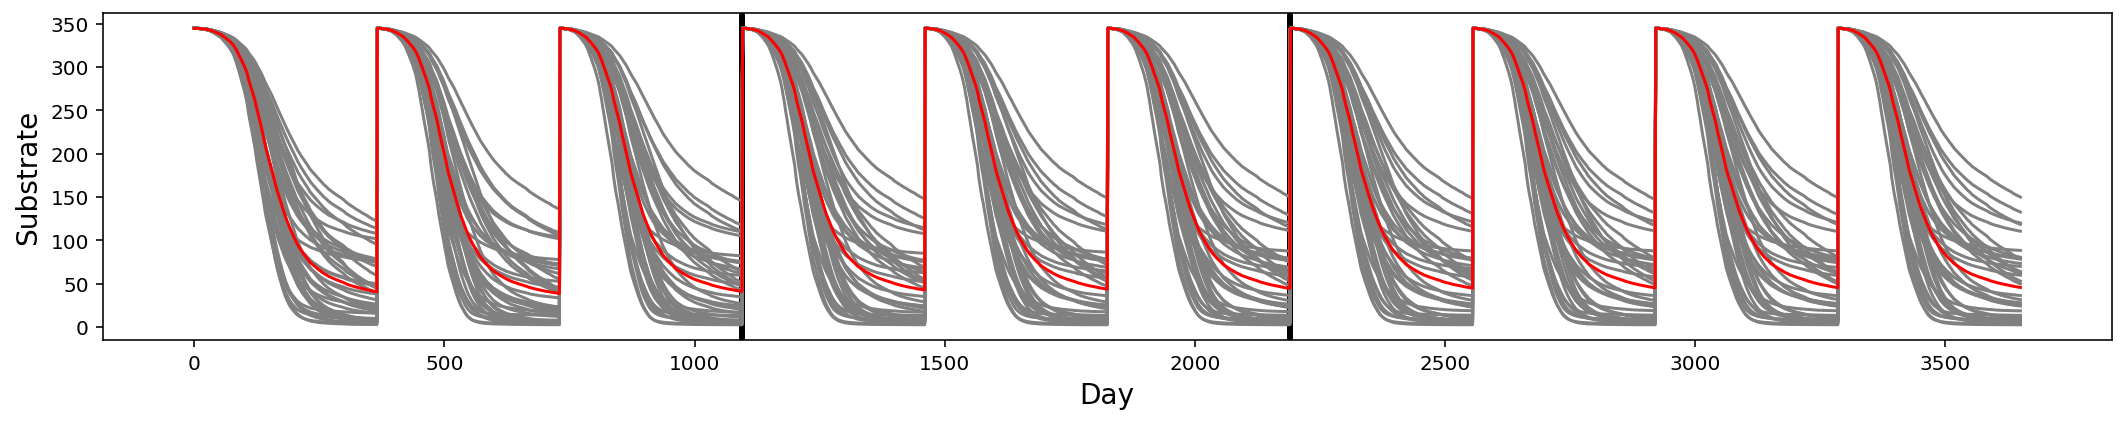

In [7]:
fig,ax = plt.subplots(1,1,figsize=(18,3))
ax.set_xlabel('Day',size=14)
ax.set_ylabel('Substrate',size=14)
ax.axvline(x=365*3, color='k',linestyle='-',lw=3)
ax.axvline(x=365*6, color='k',linestyle='-',lw=3)

for replicate in range(sub_base.shape[1]):
    ax.plot(sub_base.iloc[:,replicate],color='grey')
ax.plot(sub_base.mean(axis=1),color='red')

plt.show()

## basex10_dis

In [8]:
sub_basex10 = pd.read_csv('Sub_basex10_dis.csv',index_col=0)
sub_basex10.head()

,20201,20202,20203,20204,20205,20206,20207,20208,20209,202010,...,202031,202032,202033,202034,202035,202036,202037,202038,202039,202040
0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,...,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0,3445584.0
1,3445594.8,3445595.0,3445595.0,3445598.0,3445593.0,3445598.0,3445591.0,3445598.8,3445601.8,3445592.0,...,3445599.0,3445592.0,3445597.0,3445591.0,3445593.0,3445596.0,3445596.0,3445596.0,3445593.0,3445593.0
2,3445526.2,3445544.8,3445535.8,3445533.5,3445546.0,3445561.0,3445542.2,3445549.0,3445548.8,3445524.0,...,3445552.2,3445543.5,3445553.5,3445550.2,3445531.8,3445543.5,3445549.0,3445552.8,3445546.2,3445529.2
3,3445394.8,3445429.0,3445424.2,3445411.2,3445452.2,3445490.5,3445444.2,3445454.2,3445430.8,3445397.8,...,3445458.8,3445443.5,3445457.8,3445468.0,3445415.8,3445445.2,3445458.0,3445468.5,3445455.5,3445400.8
4,3445170.5,3445233.0,3445225.8,3445206.2,3445298.0,3445355.2,3445284.5,3445280.8,3445237.0,3445182.5,...,3445302.5,3445269.5,3445288.8,3445324.5,3445214.5,3445272.8,3445305.5,3445325.0,3445295.5,3445182.5


In [9]:
sub_basex10 = sub_basex10/10000
sub_basex10.head()

,20201,20202,20203,20204,20205,20206,20207,20208,20209,202010,...,202031,202032,202033,202034,202035,202036,202037,202038,202039,202040
0,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,...,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840,344.55840
1,344.55948,344.55950,344.55950,344.55980,344.55930,344.55980,344.55910,344.55988,344.56018,344.55920,...,344.55990,344.55920,344.55970,344.55910,344.55930,344.55960,344.55960,344.55960,344.55930,344.55930
2,344.55262,344.55448,344.55358,344.55335,344.55460,344.55610,344.55422,344.55490,344.55488,344.55240,...,344.55522,344.55435,344.55535,344.55502,344.55318,344.55435,344.55490,344.55528,344.55462,344.55292
3,344.53948,344.54290,344.54242,344.54112,344.54522,344.54905,344.54442,344.54542,344.54308,344.53978,...,344.54588,344.54435,344.54578,344.54680,344.54158,344.54452,344.54580,344.54685,344.54555,344.54008
4,344.51705,344.52330,344.52258,344.52062,344.52980,344.53552,344.52845,344.52808,344.52370,344.51825,...,344.53025,344.52695,344.52888,344.53245,344.52145,344.52728,344.53055,344.53250,344.52955,344.51825


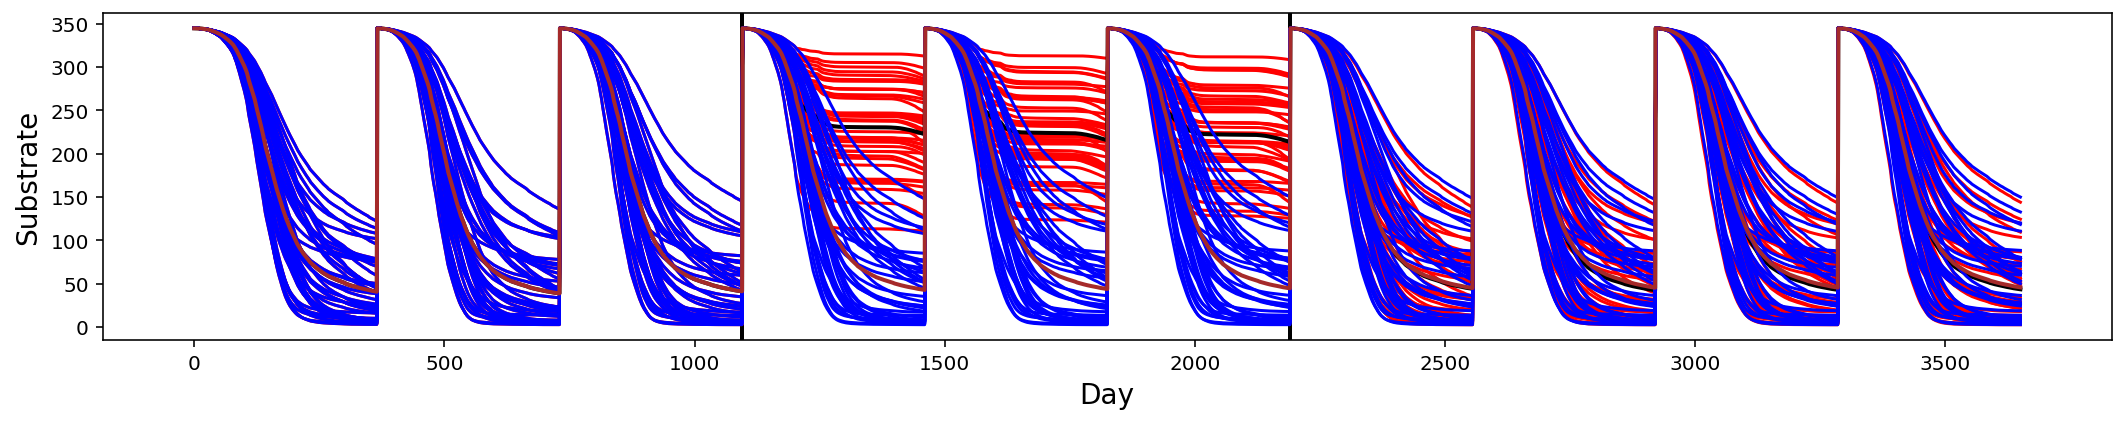

In [10]:
fig,ax = plt.subplots(1,1,figsize=(18,3))
ax.set_xlabel('Day',size=14)
ax.set_ylabel('Substrate',size=14)
ax.axvline(x=365*3, color='k',linestyle='-',lw=2)
ax.axvline(x=365*6, color='k',linestyle='-',lw=2)

for replicate in range(sub_basex10.shape[1]):
    ax.plot(sub_basex10.iloc[:,replicate],color='red')
ax.plot(sub_basex10.mean(axis=1),color='black',lw=2)

#base
for replicate in range(sub_base.shape[1]):
    ax.plot(sub_base.iloc[:,replicate],color='blue')
ax.plot(sub_base.mean(axis=1),color='brown',lw=2)

plt.show()

## Re-assembled Dataset of Year 3, 6, & 9

### Visualization 1

In [11]:
index_3   = [i for i in range(365*2+1,365*3+1)]
index_6   = [i for i in range(365*5+1,365*6+1)]
index_9   = [i for i in range(365*8+1,365*9+1)]
index_369 = index_3 + index_6 + index_9

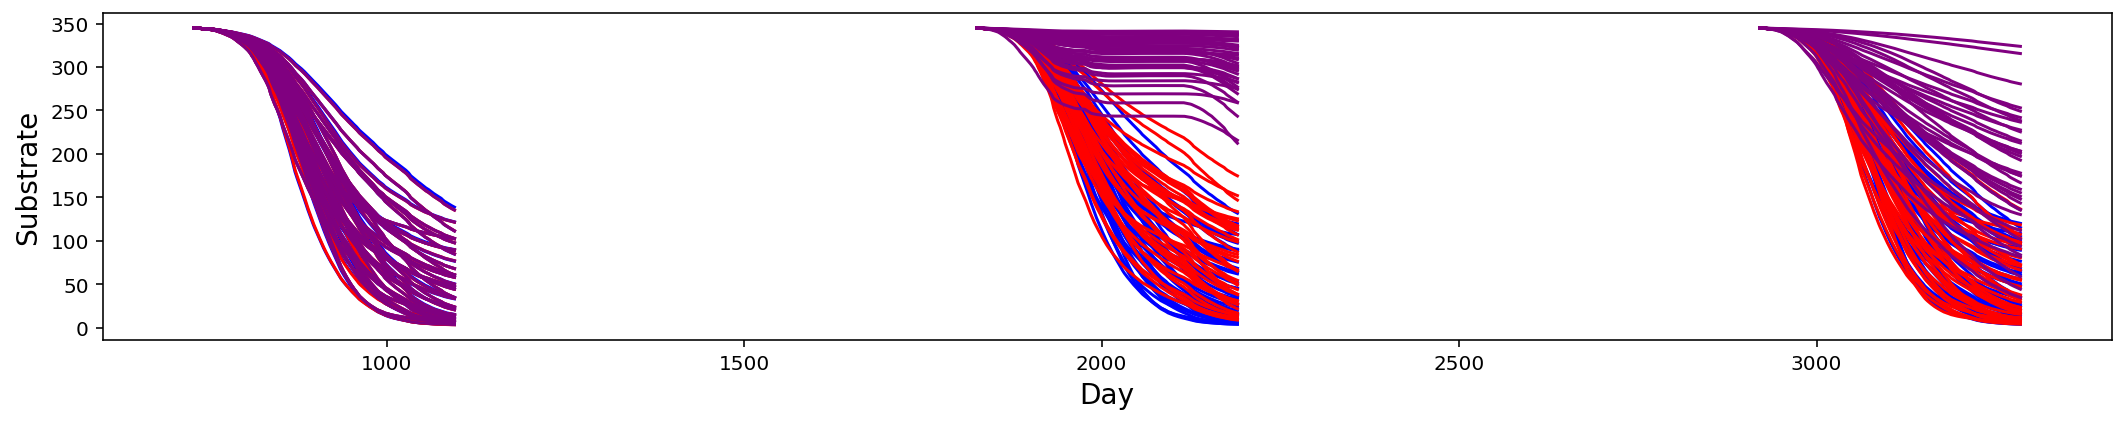

In [31]:
fig,ax = plt.subplots(1,1,figsize=(18,3))
ax.set_xlabel('Day',size=14)
ax.set_ylabel('Substrate',size=14)
#ax.axvline(x=365*3, color='k',linestyle='-',lw=2)
#ax.axvline(x=365*6, color='k',linestyle='-',lw=2)


for replicate1 in range(sub_base.shape[1]):
    ax.plot(sub_base.iloc[index_3,replicate1],color='blue')
    ax.plot(sub_base.iloc[index_6,replicate1],color='blue')
    ax.plot(sub_base.iloc[index_9,replicate1],color='blue')
    
for replicate2 in range(sub_basex2.shape[1]):
    ax.plot(sub_basex2.iloc[index_3,replicate2],color='red')
    ax.plot(sub_basex2.iloc[index_6,replicate2],color='red')
    ax.plot(sub_basex2.iloc[index_9,replicate2],color='red')
    
    
for replicate15 in range(sub_basex15.shape[1]):
    ax.plot(sub_basex15.iloc[index_3,replicate15],color='purple')
    ax.plot(sub_basex15.iloc[index_6,replicate15],color='purple')
    ax.plot(sub_basex15.iloc[index_9,replicate15],color='purple')

### Visualization 2

**Make the 3 Years stick together**

In [12]:
sub_base369    = sub_base.iloc[index_369,:].reset_index(drop=True)
#sub_basex4369  = sub_basex4.iloc[index_369,:].reset_index(drop=True)
sub_basex10369 = sub_basex10.iloc[index_369,:].reset_index(drop=True)

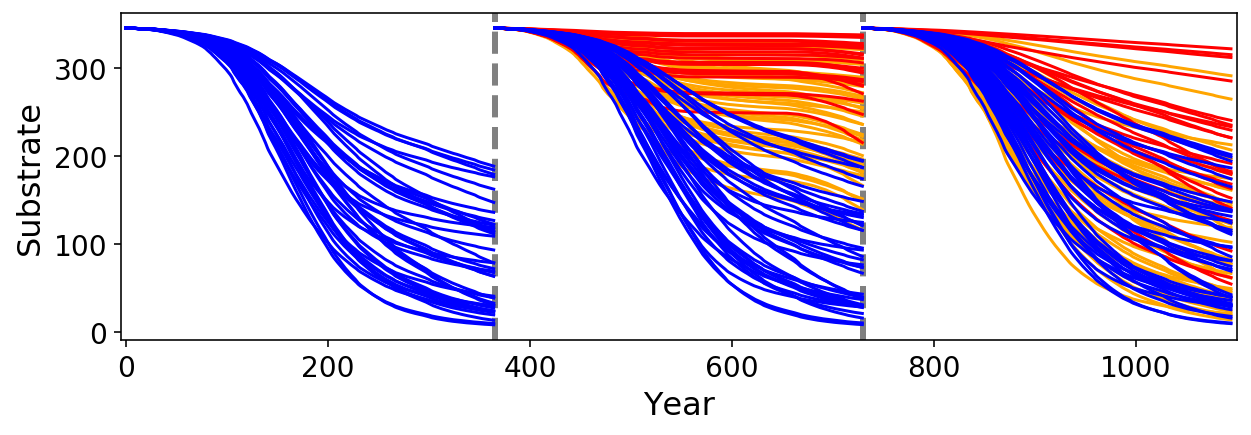

In [20]:
fig,ax = plt.subplots(1,1,figsize=(10,3))
ax.set_xlabel('Year',size=16)
ax.set_ylabel('Substrate',size=16)
ax.axvline(x=365*1, color='grey',linestyle='--',lw=3)
ax.axvline(x=365*2, color='grey',linestyle='--',lw=3)
ax.set_xlim(-5,365*3+5)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)


for replicate in range(sub_basex4369.shape[1]):
    #ax.plot(sub_basex2369.iloc[0:365*1,replicate],   color='yellow')
    ax.plot(sub_basex4369.iloc[365*1:365*2,replicate],color='orange')
    ax.plot(sub_basex4369.iloc[365*2:365*3,replicate],color='orange')
    
for replicate in range(sub_basex10369.shape[1]):
    #ax.plot(sub_basex15369.iloc[0:365*1,replicate],   color='red')
    ax.plot(sub_basex10369.iloc[365*1:365*2,replicate],color='red')
    ax.plot(sub_basex10369.iloc[365*2:365*3,replicate],color='red')

for replicate in range(sub_base369.shape[1]):
    ax.plot(sub_base369.iloc[0:365*1,    replicate],color='blue')
    ax.plot(sub_base369.iloc[365*1:365*2,replicate],color='blue')
    ax.plot(sub_base369.iloc[365*2:365*3,replicate],color='blue')

plt.show()

## re-sample data

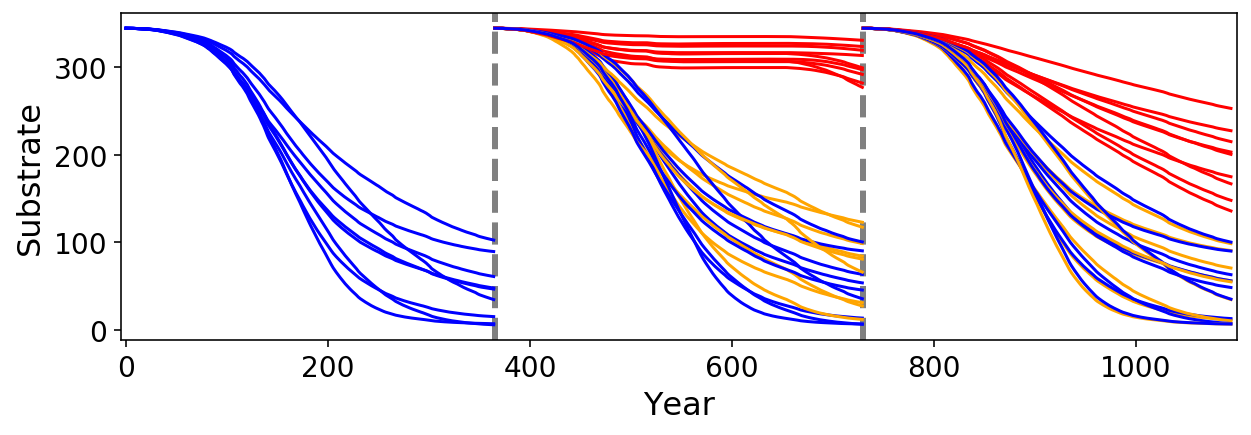

In [34]:
fig,ax = plt.subplots(1,1,figsize=(10,3))
ax.set_xlabel('Year',size=16)
ax.set_ylabel('Substrate',size=16)
ax.axvline(x=365*1, color='grey',linestyle='--',lw=3)
ax.axvline(x=365*2, color='grey',linestyle='--',lw=3)
ax.set_xlim(-5,365*3+5)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)


for replicate in [0,3,4,6,8,9,10,11,12]:
    #ax.plot(sub_basex2369.iloc[0:365*1,replicate],   color='yellow')
    ax.plot(sub_basex2369.iloc[365*1:365*2,replicate],color='orange')
    ax.plot(sub_basex2369.iloc[365*2:365*3,replicate],color='orange')
    

    #ax.plot(sub_basex15369.iloc[0:365*1,replicate],   color='red')
    ax.plot(sub_basex15369.iloc[365*1:365*2,replicate],color='red')
    ax.plot(sub_basex15369.iloc[365*2:365*3,replicate],color='red')


    ax.plot(sub_base369.iloc[0:365*1,    replicate],color='blue')
    ax.plot(sub_base369.iloc[365*1:365*2,replicate],color='blue')
    ax.plot(sub_base369.iloc[365*2:365*3,replicate],color='blue')

plt.show()

#### Define Function of Confidence Interval

In [13]:
def confi_interval(df):
    alpha = 0.05
    
    lower = df.apply(
        lambda df: df.mean() - (stats.t.ppf(1 - alpha/2, df.count()-1) * df.std(ddof=1)/np.sqrt(df.count())),axis=1
    )
    upper = df.apply(lambda df: df.mean() + (stats.t.ppf(1 - alpha/2, df.count()-1) * df.std(ddof=1)/np.sqrt(df.count())),axis=1)
    
    return lower,upper

In [14]:
#replicate = [0,3,4,6,8,9,10,11,12]

bound369    = confi_interval(sub_base369.iloc[:,:])

#boundx2369  = confi_interval(sub_basex2369.iloc[:,:])
#boundx4369  = confi_interval(sub_basex4369.iloc[:,:])
boundx10369 = confi_interval(sub_basex10369.iloc[:,:])

#boundx10_dis369 = confi_interval(sub_basex10_dis369.iloc[:,:]) # cumulative initialization

#boundx15369 = confi_interval(sub_basex15369.iloc[:,:])
#boundx20369 = confi_interval(sub_basex20369.iloc[:,:])

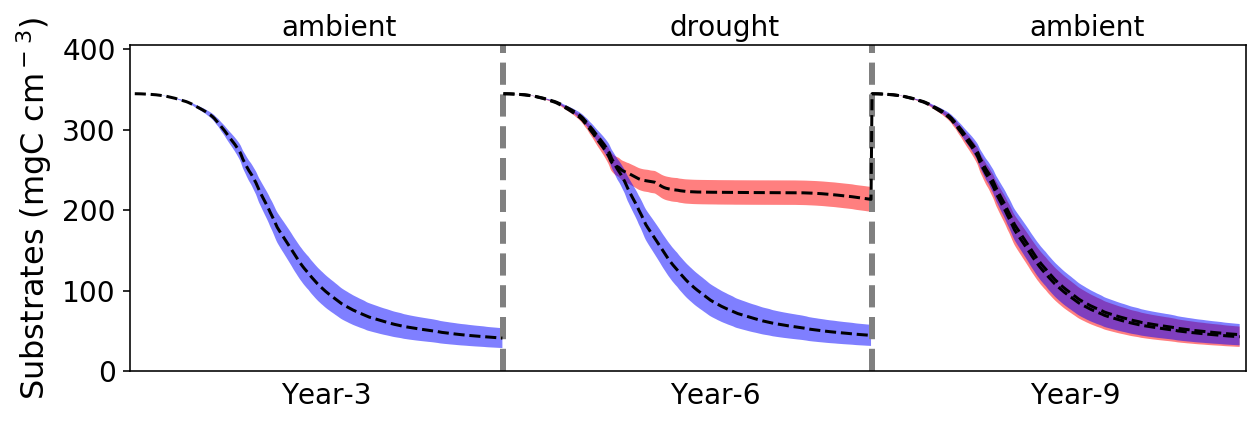

In [17]:
fig,ax = plt.subplots(1,1,figsize=(10,3))
ax.axvline(x=365*1, color='grey',linestyle='--',lw=3)
ax.axvline(x=365*2, color='grey',linestyle='--',lw=3)
ax.set_xlim(-5,365*3+5)
ax.set_ylim(0,400+5)

ax.tick_params(bottom=False,labelbottom=False)    
#ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

#ax.set_xlabel('Year',size=16)
ax.set_ylabel("Substrates (mgC cm$^-$$^3$)",size=16,weight='normal', color='k')
plt.figtext(0.23,0.05,'Year-3',fontsize=14)
plt.figtext(0.50,0.05,'Year-6',fontsize=14)
plt.figtext(0.75,0.05,'Year-9',fontsize=14)

plt.figtext(0.23,0.9,'ambient',fontsize=14)
plt.figtext(0.50,0.9,'drought',fontsize=14)
plt.figtext(0.75,0.9,'ambient',fontsize=14)

ax.plot(sub_basex10369.mean(axis=1)[365*1:365*3],color='k',linestyle='--')
ax.fill_between(x=sub_basex10369.index[365*1:365*2],y1=boundx10369[0][365*1:365*2],y2=boundx10369[1][365*1:365*2], facecolor='red',alpha=0.5)
ax.fill_between(x=sub_basex10369.index[365*2:365*3],y1=boundx10369[0][365*2:365*3],y2=boundx10369[1][365*2:365*3], facecolor='red',alpha=0.5)

#ax.fill_between(x=sub_basex2369.index, y1=boundx2369[0], y2=boundx2369[1],  facecolor='orange', alpha=1.0)
ax.plot(sub_base369.mean(axis=1)[365*0:365*1],color='k',linestyle='--')
ax.fill_between(x=sub_base369.index[365*0:365*1], y1=bound369[0][365*0:365*1], y2=bound369[1][365*0:365*1], facecolor='blue', alpha=0.5) 
ax.plot(sub_base369.mean(axis=1)[365*1:365*2],color='k',linestyle='--')
ax.fill_between(x=sub_base369.index[365*1:365*2], y1=bound369[0][365*1:365*2], y2=bound369[1][365*1:365*2], facecolor='blue', alpha=0.5) 
ax.plot(sub_base369.mean(axis=1)[365*2:365*3],color='k',linestyle='--')
ax.fill_between(x=sub_base369.index[365*2:365*3], y1=bound369[0][365*2:365*3], y2=bound369[1][365*2:365*3], facecolor='blue', alpha=0.5) 

#ax.legend()

#plt.savefig('legacy_sub.pdf',bbox_inches='tight')

plt.show()